In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib.patches import Rectangle
import wcsaxes
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.wcs import WCS
import matplotlib.patheffects as PE
import brewer2mpl
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
dark2 = brewer2mpl.get_map('Dark2', 'qualitative', 8).mpl_colors
import prettyplotlib as ppl
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
rc('axes', color_cycle=set2)

In [2]:
hdu = fits.open('../../ocen_images/Omega_Cen_Ks.fits')
wcs = wcsaxes.WCS(hdu[0].header)
wcs2 = WCS(hdu[0].header)
dat = hdu[0].data
hdu.close()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [3]:
blerp = pd.read_csv('Kaluzny2004rrl.txt', usecols=[1,2,4], delim_whitespace=True)
typeab = blerp[blerp.type == 0]
typec = blerp[blerp.type == 1]

ra1 = coord.Angle(typeab.ra, unit='hour')
abra = ra1.degree
dec1 = coord.Angle(typeab.dec, unit='deg')
abdec = dec1.degree

ra2 = coord.Angle(typec.ra, unit='hour')
cra = ra2.degree
dec2 = coord.Angle(typec.dec, unit='deg')
cdec = dec2.degree

x1, y1 = wcs2.all_world2pix(abra, abdec, 1)
x2, y2 = wcs2.all_world2pix(cra, cdec, 1)

3p6um
4p5um
3p6um
4p5um
3p6um
4p5um


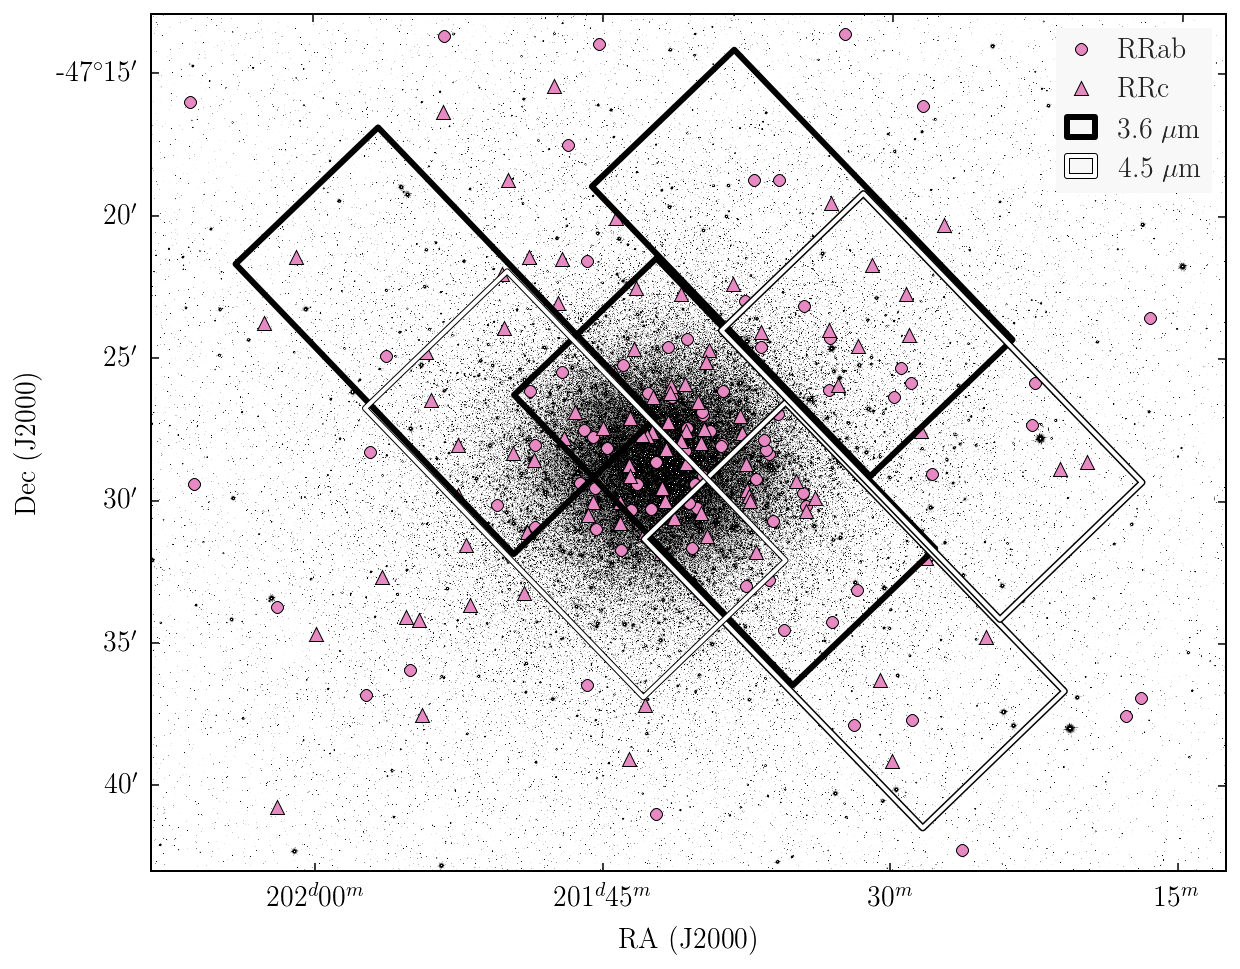

In [6]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_axes([0.12,0.12,0.83,0.83], projection=wcs, aspect='equal')
#ax = fig.add_subplot(111, projection=wcs, aspect='equal')
lon = ax.coords[0]
lat = ax.coords[1]
lat.set_separator(('$^{\circ}$', '$^{\prime}$', '$^{\prime\prime}$'))
lon.set_separator(('$^d$', '$^m$', '$^s$'))
dat[dat<1] = 1
ax.imshow(np.log10(dat), vmin=2, vmax=3, cmap='Greys', zorder=-1)
ax.set_xlim(2200,dat.shape[1]-1100)
ax.set_ylim(700,dat.shape[0]-100)
for i in glob.glob('../../ocen_images/omegaCen_*.fits'):
    mapnum = int(i.split('_')[2])
    filt = i.split('_')[5].split('.')[0]
    print filt
    f = fits.open(i)
    instrument_wcs = wcsaxes.WCS(f[0].header)
    yshape = f[0].data.shape[0]
    xshape = f[0].data.shape[1]
    f.close()
    if filt == '3p6um':
        if mapnum == 1:
            r = Rectangle((0, 0), xshape, yshape, linestyle='solid', linewidth = 3, facecolor='none',
                          transform=ax.get_transform(instrument_wcs), edgecolor='k',
                          label = '$3.6\ \mu$m', zorder = 4-mapnum)
        else:
            r = Rectangle((0, 0), xshape, yshape, linestyle='solid', linewidth = 3, facecolor='none',
                          transform=ax.get_transform(instrument_wcs), edgecolor='k', zorder = 4-mapnum)
    if filt == '4p5um':
        if mapnum == 1:
            r = Rectangle((0, 0), xshape, yshape, linestyle='solid', linewidth = 2, facecolor='none',
                          transform=ax.get_transform(instrument_wcs), edgecolor='w',
                          label = '$4.5\ \mu$m', zorder = 4-mapnum,
                          path_effects=[PE.withStroke(linewidth=3, foreground='k')])
        else:
            r = Rectangle((0, 0), xshape, yshape, linestyle='solid', linewidth = 2, facecolor='none',
                          transform=ax.get_transform(instrument_wcs), edgecolor='w', zorder = 4-mapnum,
                          path_effects=[PE.withStroke(linewidth=3.5, foreground='k')])
    ax.add_patch(r)
ppl.plot(ax, x1, y1, 'o', alpha=1, zorder=0, color=set2[3],
            linewidth=1, markersize=6, label='RRab', rasterized=True)
ppl.plot(ax, x2, y2, '^', alpha=1, zorder=0, color=set2[3],
            linewidth=1, markersize=7, label='RRc', rasterized=True)
plt.xlabel('RA (J2000)')
plt.ylabel('Dec (J2000)')
#plt.title(r'IRAC observation coverage', fontsize=15)
ppl.legend(loc=1, prop={'size':14}, handlelength=1, numpoints=1)
#fig.tight_layout()
fig.savefig('final_plots/omegacen_coverage_map_new.pdf', dpi=400)